### Classification Task with Tensorflow

**early stopping** -- automatic stopping of training based on a loss condition on the validation data passed during the model.fit() call

**drop out layers** -- layers that can be added to turn off neurons to avoid over fitting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("TensorFlow_FILES/DATA/cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### EDA

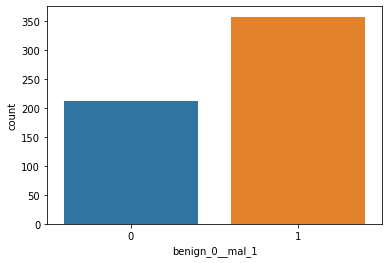

In [6]:
# checking balances
sns.countplot(x='benign_0__mal_1',data=df)

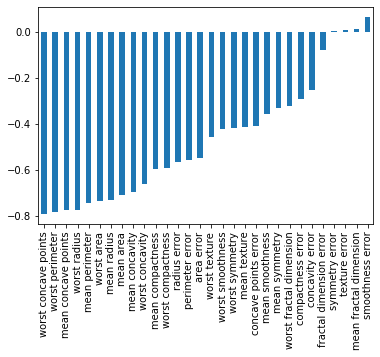

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

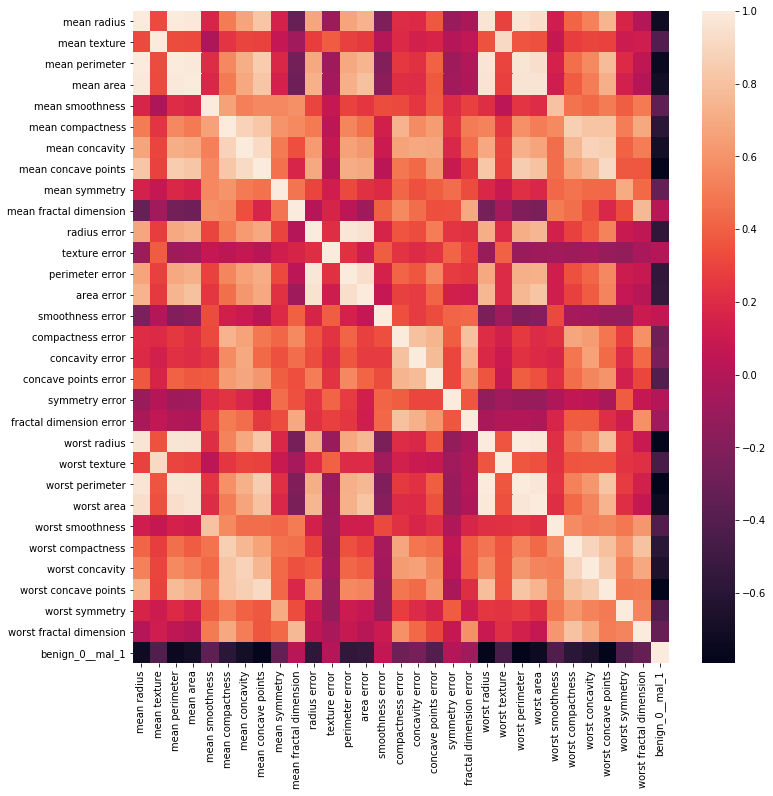

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

### Modeling

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
## Creating Model- Binary Classification

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


model.fit(x=X_train,y=y_train,
          epochs = 600, #to show overfitting
          validation_data=(X_test,y_test))


Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6771 - val_loss: 0.6568
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6497 - val_loss: 0.6203
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6150 - val_loss: 0.5847
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5753 - val_loss: 0.5372
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5326 - val_loss: 0.4884
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4862 - val_loss: 0.4354
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4337 - val_loss: 0.3840
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3838 - val_loss: 0.3368
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3390 - val_loss: 0.3032
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2990 - val_loss: 0.2707
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0461 - val_loss: 0.3041
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0444 - val_loss: 0.3003
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0444 - val_loss: 0.3043
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0443 - val_loss: 0.3384
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0437 - val_loss: 0.2794
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0475 - val_loss: 0.3571
Epoch 89/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0440 - val_loss: 0.3043
Epoch 90/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0427 - val_loss: 0.3009
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0430 - val_loss: 0.2891
Epoch 92/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0425 - val_loss: 0.3291

14/14 [==============================] - 0s 5ms/step - loss: 0.0320 - val_loss: 0.4183
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.4321
Epoch 166/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0293 - val_loss: 0.3923
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.4384
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0323 - val_loss: 0.4631
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0310 - val_loss: 0.4068
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0320 - val_loss: 0.4806
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0295 - val_loss: 0.4301
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.4090
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0328 - val_loss: 0.4579
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.5981
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.5112
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.5588
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 0.5392
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0208 - val_loss: 0.5788
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.5466
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.5531
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0187 - val_loss: 0.5757
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0191 - val_loss: 0.5672
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.5605
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0132 - val_loss: 0.7210
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.7024
Epoch 328/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0132 - val_loss: 0.7096
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.7440
Epoch 330/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0132 - val_loss: 0.6738
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0146 - val_loss: 0.7407
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0124 - val_loss: 0.7057
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.7782
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.6303
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0148 - val_loss: 0.7657
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.8741
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.8210
Epoch 409/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0079 - val_loss: 0.9398
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.8125
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.9428
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.8197
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.8788
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.8426
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.8885
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.8277
Epoc

14/14 [==============================] - 0s 17ms/step - loss: 0.0079 - val_loss: 0.9121
Epoch 489/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 1.1105
Epoch 490/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0080 - val_loss: 0.9504
Epoch 491/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0069 - val_loss: 1.0850
Epoch 492/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0048 - val_loss: 0.9808
Epoch 493/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0089 - val_loss: 1.1183
Epoch 494/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0090 - val_loss: 0.9309
Epoch 495/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 1.0467
Epoch 496/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0049 - val_loss: 1.0015
Epoch 497/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0043 - val_loss: 1

14/14 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 1.1972
Epoch 570/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 1.2404
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 1.1541
Epoch 572/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 1.2310
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 1.2167
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 1.1558
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 1.2448
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 1.1676
Epoch 577/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 1.2229
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 1.1775
Epoc

In [24]:
## Plotting loss

losses=pd.DataFrame(model.history.history)

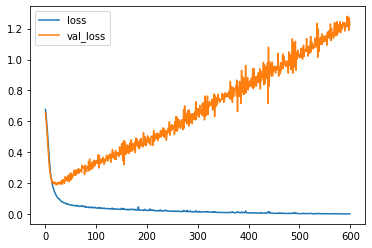

In [25]:
# obviously over fitting
losses.plot()

In [27]:
## Stop training


model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping

# we're trying to minimize the loss
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                           verbose=1,
                           patience=25) # will wait 25 epochs before stopping

model.fit(x=X_train,y=y_train,
          epochs = 600, #to show overfitting
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6855 - val_loss: 0.6733
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6576 - val_loss: 0.6431
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6319 - val_loss: 0.6123
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6002 - val_loss: 0.5740
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5641 - val_loss: 0.5306
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5243 - val_loss: 0.4849
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4787 - val_loss: 0.4386
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4371 - val_loss: 0.3959
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3963 - val_loss: 0.3582
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3605 - val_loss: 0.3233
Epoch 11

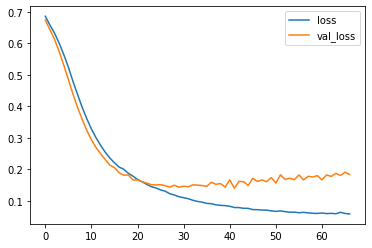

In [29]:

model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

## Adding in dropout layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
# Rate is the proportion of neurons that are randomly turned off
# common rate is between 0.2 and 0.5

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5)) # half of the neurons will be turned off randomly, won't have their weights and bi

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# we're trying to minimize the loss
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                           verbose=1,
                           patience=25) # will wait 25 epochs before stopping



In [33]:
model.fit(x=X_train,y=y_train,
          epochs = 600, #to show overfitting
          validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.7111 - val_loss: 0.6882
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6842 - val_loss: 0.6662
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6642 - val_loss: 0.6448
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6472 - val_loss: 0.6166
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6156 - val_loss: 0.5878
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5966 - val_loss: 0.5635
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5788 - val_loss: 0.5299
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5729 - val_loss: 0.5039
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5198 - val_loss: 0.4706
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5020 - val_loss: 0.4332
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1265 - val_loss: 0.1841
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1047 - val_loss: 0.2263
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1177 - val_loss: 0.2351
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1235 - val_loss: 0.1784
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1183 - val_loss: 0.1957
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1064 - val_loss: 0.2498
Epoch 00088: early stopping


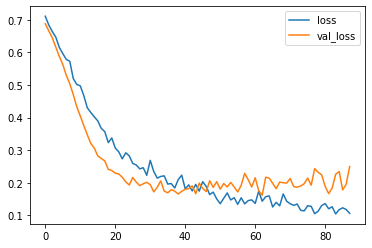

In [34]:

model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

## Much better. After 40 Epochs we should stop learning

In [38]:
predictions = model.predict_classes(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88        55
           1       0.99      0.84      0.91        88

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.89       143
weighted avg       0.91      0.90      0.90       143



In [42]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [14 74]]
